# **Importing Libraries and packages.**

In [ ]:
!pip install datasets
from datasets import load_metric, load_dataset
import numpy as np
import random
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.9 MB/s eta 0:00:00


In [ ]:
%env WANDB_LOG_MODEL=true
%env WANDB_WATCH=all
# %env TOKENIZERS_PARALLELISM = False ## If you are using multiple GPUs, set this to True
# wandb.init(project="abbDet-roberta-base", entity="<your-wandb-user>")

env: WANDB_LOG_MODEL=true
env: WANDB_WATCH=all


# **Loading and inspecting the Dataset.**

In [ ]:
datasets = load_dataset("surrey-nlp/PLOD-CW")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/1072 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/126 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/153 [00:00<?, ? examples/s]

In [ ]:
dataset = datasets

In [ ]:
# Display sample values for each split
for split in dataset.keys():
    print(f"\nSample values for {split} dataset:")
    sample = dataset[split][0]  # Assuming you want to display the first row
    for feature in dataset[split].features:
        print(f"{feature}: {sample[feature]}")


Sample values for train dataset:
tokens: ['For', 'this', 'purpose', 'the', 'Gothenburg', 'Young', 'Persons', 'Empowerment', 'Scale', '(', 'GYPES', ')', 'was', 'developed', '.']
pos_tags: ['ADP', 'DET', 'NOUN', 'DET', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'AUX', 'VERB', 'PUNCT']
ner_tags: ['B-O', 'B-O', 'B-O', 'B-O', 'B-LF', 'I-LF', 'I-LF', 'I-LF', 'I-LF', 'B-O', 'B-AC', 'B-O', 'B-O', 'B-O', 'B-O']

Sample values for validation dataset:
tokens: ['=', 'Manual', 'Ability', 'Classification', 'System', ';', 'QUEST', '=', 'Quest', '-', 'Quality', 'of', 'upper', 'extremity', 'skills', 'test', ';', 'Cont', '=', 'control', ';', 'M', '=', 'male', ',', 'F', '=', 'female', ',', 'V', '=', 'verbal', ',', 'nonV', '=', 'non', '-', 'Verbal', ',', '|Quad', '=', 'quadriplegia', ',', 'Di', '=', 'Diplegia', ',', 'Hemi', '=', 'hemiplegia', '.']
pos_tags: ['PUNCT', 'PROPN', 'PROPN', 'PROPN', 'PROPN', 'PUNCT', 'PROPN', 'PUNCT', 'PROPN', 'ADJ', 'PROPN', 'ADP', 'ADJ', 'NOUN', 

In [ ]:
# Display sample values for each split
for split in dataset.keys():
    print(f"\nSample values for {split} dataset:")
    sample = dataset[split][0]  # Assuming you want to display the first row
    for token, ner_tag in zip(sample['tokens'], sample['ner_tags']):
        print(f"Token: {token}, NER Tag: {ner_tag}")


#  **DATASET VISUALISATION AND ANALYSIS - TRAINING SET**

In [ ]:
#from datasets import load_dataset
import pandas as pd

# Convert train, validation, and test splits into pandas DataFrames
train_df = pd.DataFrame(dataset['train'])
validation_df = pd.DataFrame(dataset['validation'])
test_df = pd.DataFrame(dataset['test'])

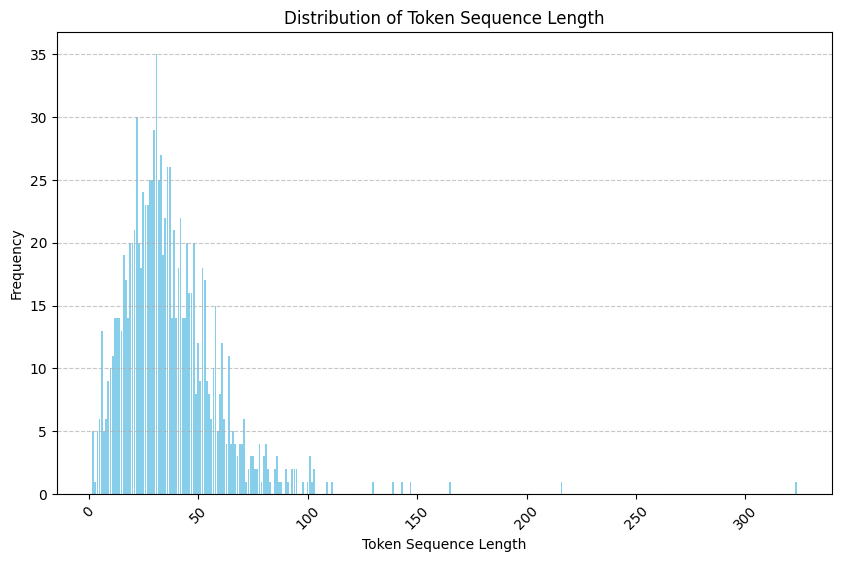

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming train_df is your DataFrame
# Calculate the length of each token sequence and store it in a new column 'token_length'
train_df['token_length'] = train_df['tokens'].apply(len)

# Get the distribution of token sequence lengths
token_length_distribution = train_df['token_length'].value_counts()

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.bar(token_length_distribution.index, token_length_distribution.values, color='skyblue')
plt.xlabel('Token Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Token Sequence Length')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Explode the lists in the DataFrame
train_df_exploded = train_df.explode('tokens').reset_index(drop=True)
train_df_exploded['pos_tags'] = train_df.explode('pos_tags').reset_index(drop=True)['pos_tags']
train_df_exploded['ner_tags'] = train_df.explode('ner_tags').reset_index(drop=True)['ner_tags']

In [ ]:
train_df_exploded

,tokens,pos_tags,ner_tags
0,For,ADP,B-O
1,this,DET,B-O
2,purpose,NOUN,B-O
3,the,DET,B-O
4,Gothenburg,PROPN,B-LF
...,...,...,...
39995,PCR,NOUN,B-O
39996,experiments,NOUN,B-O
39997,demonstrated,VERB,B-O
39998,that,SCONJ,B-O


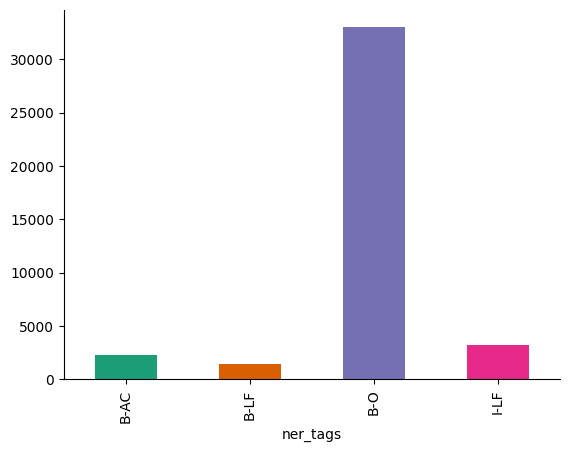

In [ ]:
# @title ner_tags

from matplotlib import pyplot as plt
import seaborn as sns
train_df_exploded.groupby('ner_tags').size().plot(kind='bar', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Abbreviation length distribution calculation.

In [ ]:
# Initialize abbreviation length categories and unique abbreviations by length
abbreviation_length_categories = {
    '1': {'total': 0, 'unique': 0},
    '2': {'total': 0, 'unique': 0},
    '3': {'total': 0, 'unique': 0},
    '4': {'total': 0, 'unique': 0},
    '5': {'total': 0, 'unique': 0},
    '6+': {'total': 0, 'unique': 0},
}

unique_abbreviations_by_length = {
    '1': set(),
    '2': set(),
    '3': set(),
    '4': set(),
    '5': set(),
    '6+': set(),
}

# Iterate through abbreviations to update counts
for tokens in train_df_exploded[train_df_exploded['ner_tags'].isin(['B-AC'])]['tokens']:
    # Combine tokens into abbreviation string
    abbreviation = ''.join(tokens)#.lower()  # Convert to lowercase for normalization
    length = len(abbreviation)

    # Update total count for the category
    if length >= 6:
        abbreviation_length_categories['6+']['total'] += 1
        category = '6+'
    else:
        abbreviation_length_categories[str(length)]['total'] += 1
        category = str(length)

    # Check if normalized abbreviation is unique for the category and update the count
    if abbreviation not in unique_abbreviations_by_length[category]:
        unique_abbreviations_by_length[category].add(abbreviation)
        abbreviation_length_categories[category]['unique'] += 1

# Calculate total unique count
total_unique_count = sum(len(unique_set) for unique_set in unique_abbreviations_by_length.values())

# Your existing code for abbreviations and its counts
abbreviations = train_df_exploded[train_df_exploded['ner_tags'] == 'B-AC']['tokens']
abbreviation_counts = abbreviations.value_counts()
top_n_abbreviations = 0
most_frequent_abbreviations = abbreviation_counts.nlargest(top_n_abbreviations)
num_unique_abbreviations = len(abbreviation_counts)
total_abbreviations = abbreviation_counts.sum()

# Print top N most frequent abbreviations and their counts
print("Top", top_n_abbreviations, "most frequent abbreviations and their counts:")
for abbreviation, count in most_frequent_abbreviations.items():
    print(f"{abbreviation}: {count}")

# Print total number of abbreviations
print("Total number of abbreviations:", total_abbreviations)

# Print number of unique abbreviations
print("Number of unique abbreviations:", num_unique_abbreviations)

# Print number of abbreviations by length category
print("Number of abbreviations by length category:")
for length, category_counts in abbreviation_length_categories.items():
    print(f"{length} characters: total: {category_counts['total']}, unique: {category_counts['unique']}")

# Print total count of unique abbreviations
print("Total count of unique abbreviations:", total_unique_count)


Top 0 most frequent abbreviations and their counts:
Total number of abbreviations: 2336
Number of unique abbreviations: 1569
Number of abbreviations by length category:
1 characters: total: 41, unique: 28
2 characters: total: 500, unique: 226
3 characters: total: 906, unique: 592
4 characters: total: 458, unique: 352
5 characters: total: 206, unique: 169
6+ characters: total: 225, unique: 202
Total count of unique abbreviations: 1569


Abbreviation length distribution visualisation.

Explanation: The pie chart inside the donut represents the proportions of unique abbreviations within each category.


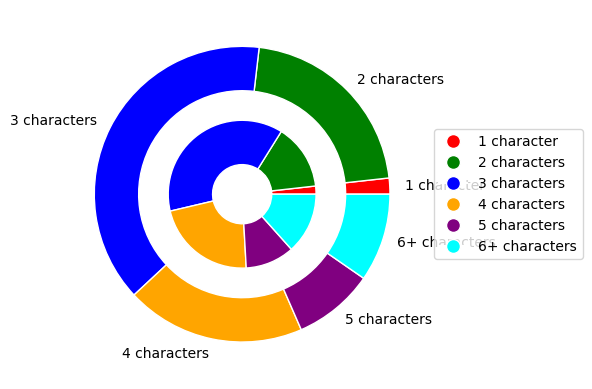

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Data for donut chart
sizes_donut = [41, 500, 906, 458, 206, 225]  # Total counts for each category
labels_donut = ['1 character', '2 characters', '3 characters', '4 characters', '5 characters', '6+ characters']
colors_donut = ['red', 'green', 'blue', 'orange', 'purple', 'cyan']  # Colors for each category

# Data for pie chart inside donut
sizes_pie = [28, 226, 592, 350, 169, 211]  # Unique counts for each category
labels_pie = ['1 character', '2 characters', '3 characters', '4 characters', '5 characters', '6+ characters']
colors_pie = colors_donut  # Use the same colors for consistency

fig, ax = plt.subplots()

# Create donut chart
ax.pie(sizes_donut, labels=labels_donut, colors=colors_donut, radius=1, wedgeprops=dict(width=0.3, edgecolor='w'))

# Create pie chart inside donut
ax.pie(sizes_pie, radius=0.5, colors=colors_pie, wedgeprops=dict(width=0.3, edgecolor='w'))

# Create a legend for the colors
legend_elements = [Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10)
                   for label, color in zip(labels_donut, colors_donut)]
ax.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, 0.5))  # Adjust legend position

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

# Print explanation of the pie chart outside the chart
print("Explanation: The pie chart inside the donut represents the proportions of unique abbreviations within each category.")

plt.show()


Long form length distribution calculation.

In [ ]:
# Initialize an empty list to store the combined long forms
combined_long_forms = []

# Initialize an empty string to store the current long form
current_long_form = ""

# Iterate through the tokens column to combine consecutive tokens into phrases representing long forms
for index, token in enumerate(train_df_exploded['tokens']):
    # Check if the token is part of a long form (e.g., B-LF or I-LF)
    if train_df_exploded.iloc[index]['ner_tags'] in ['B-LF', 'I-LF']:
        # If the current long form is not empty, add a space before appending the next token
        if current_long_form:
            current_long_form += " "
        # Append the token to the current long form
        current_long_form += token
    # If the token does not belong to a long form or if it's the last token, add the current long form to the list and reset it
    else:
        if current_long_form:
            combined_long_forms.append(current_long_form)
            current_long_form = ""

# Calculate the lengths of long forms based on the number of words (tokens)
long_form_lengths = [len(long_form.split()) for long_form in combined_long_forms]

# Group the lengths into categories
length_categories = {
    '1': {'total': 0, 'unique': 0},
    '2': {'total': 0, 'unique': 0},
    '3': {'total': 0, 'unique': 0},
    '4': {'total': 0, 'unique': 0},
    '5': {'total': 0, 'unique': 0},
    '6+': {'total': 0, 'unique': 0}
}

# Initialize a set to store unique long forms
unique_long_forms = set()

# Count the occurrences of each length category and unique long forms
for long_form in combined_long_forms:
    length = len(long_form.split())
    category = str(length) if length < 6 else '6+'
    length_categories[category]['total'] += 1
    unique_long_forms.add(long_form)

# Update unique counts for each length category
for long_form in unique_long_forms:
    length = len(long_form.split())
    category = str(length) if length < 6 else '6+'
    length_categories[category]['unique'] += 1

# Print top N most frequent long forms and their counts
top_n = 10  # Adjust as needed
print(f"Top {top_n} most frequent long forms and their counts:")
long_form_counts = {}
for long_form in combined_long_forms:
    long_form_counts[long_form] = long_form_counts.get(long_form, 0) + 1

sorted_long_forms = sorted(long_form_counts.items(), key=lambda x: x[1], reverse=True)[:top_n]
for long_form, count in sorted_long_forms:
    print(f"{long_form}: {count}")

# Calculate total counts
total_count = sum(category['total'] for category in length_categories.values())
unique_count = sum(category['unique'] for category in length_categories.values())

# Print total number of long forms
print("Total number of long forms:", total_count)

# Print number of unique long forms
print("Number of unique long forms:", unique_count)

# Print number of long forms by length category
print("Number of long forms by length category:")
for length, counts in length_categories.items():
    print(f"{length} words: total: {counts['total']}, unique: {counts['unique']}")

# Print total count of unique long forms
print("Total count of unique long forms:", unique_count)


Top 10 most frequent long forms and their counts:
body mass index: 18
green fluorescent protein: 12
confidence interval: 11
odds ratio: 11
interquartile range: 6
hazard ratio: 6
tuberculosis: 6
false discovery rate: 6
wild - type: 5
wild type: 5
Total number of long forms: 1492
Number of unique long forms: 1271
Number of long forms by length category:
1 words: total: 164, unique: 142
2 words: total: 383, unique: 298
3 words: total: 482, unique: 406
4 words: total: 231, unique: 206
5 words: total: 117, unique: 109
6+ words: total: 115, unique: 110
Total count of unique long forms: 1271


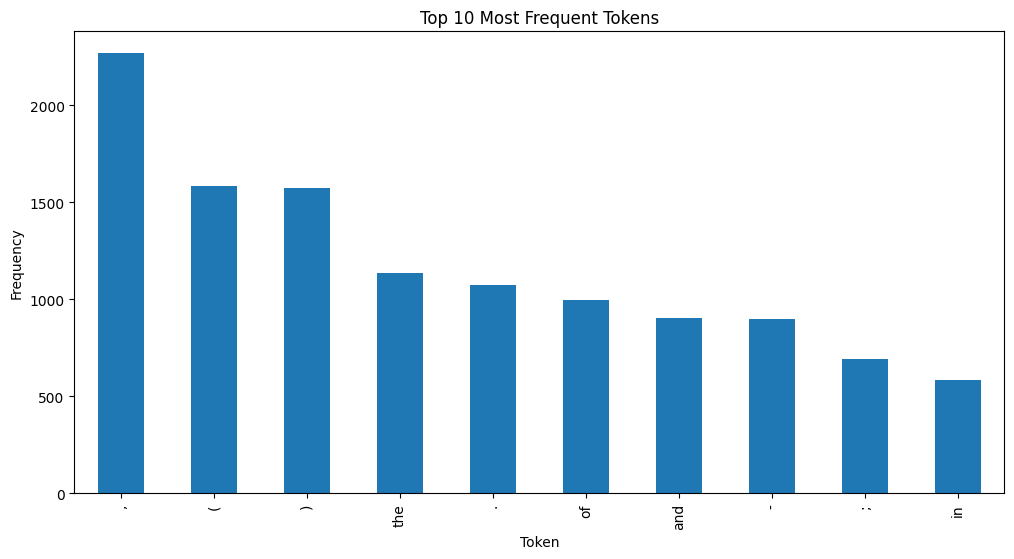

In [ ]:
# Top N most frequent tokens to display
top_n_tokens = 10  # Adjust this value as needed

# Token distribution
train_token_counts = train_df_exploded['tokens'].value_counts().nlargest(top_n_tokens)
train_token_counts.plot(kind='bar', figsize=(12, 6), title='Top {} Most Frequent Tokens'.format(top_n_tokens))
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# POS tag distribution
train_pos_counts = train_df_exploded['pos_tags'].value_counts()
train_pos_counts.plot(kind='bar', figsize=(12, 6), title='POS Tag Distribution')
plt.xlabel('POS Tag')
plt.ylabel('Frequency')
plt.show()